# Analysis

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis
from MDAnalysis import transformations
from MDAnalysis.analysis import rdf
import MDAnalysis.analysis.msd as msd

# Plot the energy versus time for water

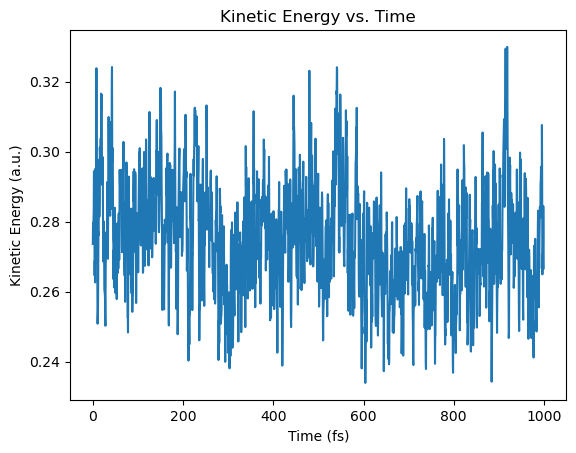

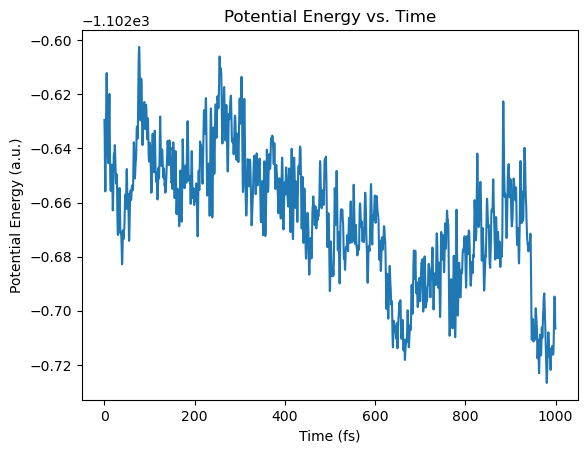

In [45]:
# read in from the .ener file in ../Runs/Water/ directory
data=np.genfromtxt('../Runs/Water/water_aimd_1ps_every0.5fs-1.ener',skip_footer=1)
# Plot the kinetic energy versus time
plt.plot(data[:,1],data[:,2])
plt.xlabel('Time (fs)')
plt.ylabel('Kinetic Energy (a.u.)')
plt.title('Kinetic Energy vs. Time')
plt.savefig('../Figures/kinetic_energy_vs_time.pdf')
plt.show()
# Plot the potential energy versus time
plt.plot(data[:,1],data[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs. Time')
plt.savefig('../Figures/potential_energy_vs_time.pdf')
plt.show()

# Compute g(r) for the oxygen

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


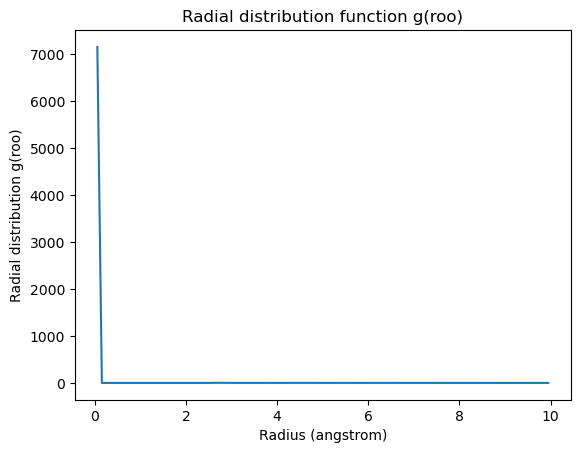

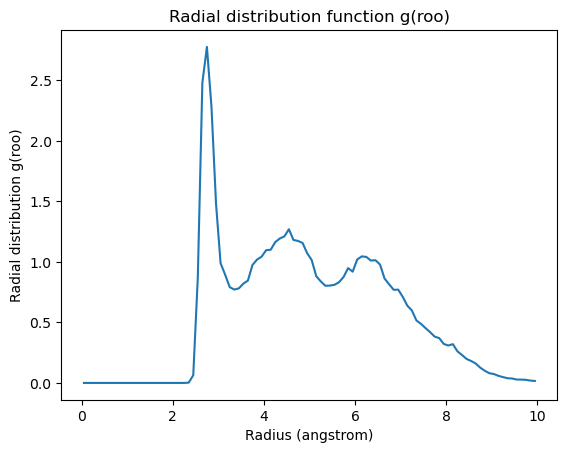

In [46]:
# Use MDAnalysis to read in the xyz trajectory file
u = MDAnalysis.Universe('../Runs/Water/water.xyz','../Runs/Water/water_aimd_1ps_every0.5fs-pos-1.xyz', topology_format="xyz")
# set the box size (12.42^3 angstroms)
dim = [12.42, 12.42, 12.42, 90, 90, 90]
# Use MDAanalysis to set box dimensions
transform = MDAnalysis.transformations.boxdimensions.set_dimensions(dim)
u.trajectory.add_transformations(transform)
# selecting the oxygen atoms for the rdf calculation
oxygen = u.select_atoms('type O')
# calculating the rdf
g_oxygen = rdf.InterRDF(oxygen, oxygen, nbins=100, range=(0.0, 10.0))
g_oxygen.run()
# Plot the rdf
plt.plot(g_oxygen.bins, g_oxygen.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution g(roo)')
plt.title('Radial distribution function g(roo)')
# plt.savefig('g_11_T1.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

g_oxygen = rdf.InterRDF(oxygen, oxygen, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
g_oxygen.run()
plt.plot(g_oxygen.bins, g_oxygen.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution g(roo)')
plt.title('Radial distribution function g(roo)')
plt.savefig('../Figures/g_oo.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()





# Plot the energy versus time for proton

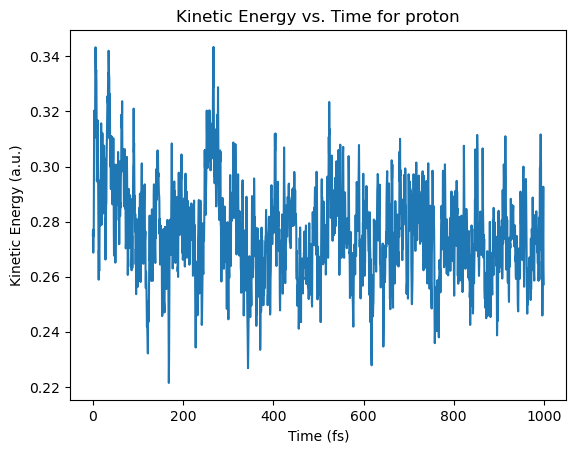

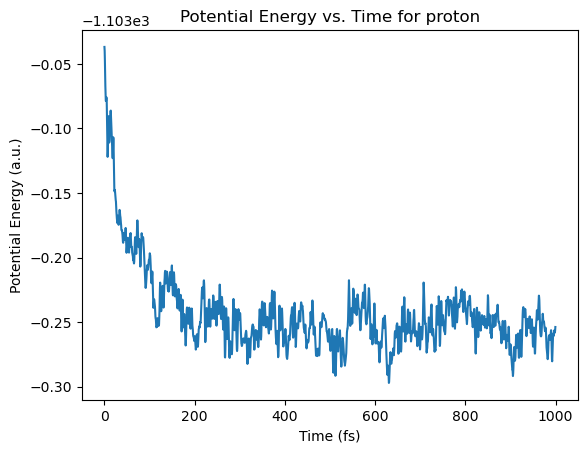

In [47]:
# read in from the .ener file in ../Runs/Proton/ directory
data=np.genfromtxt('../Runs/Proton/proton_aimd_1ps_every0.5fs-1.ener',skip_footer=1)
# Plot the kinetic energy versus time
plt.plot(data[:,1],data[:,2])
plt.xlabel('Time (fs)')
plt.ylabel('Kinetic Energy (a.u.)')
plt.title('Kinetic Energy vs. Time for proton')
plt.savefig('../Figures/proton_kinetic_energy_vs_time.pdf')
plt.show()
# Plot the potential energy versus time
plt.plot(data[:,1],data[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs. Time for proton')
plt.savefig('../Figures/proton_potential_energy_vs_time.pdf')
plt.show()

# Compute g(r) for the proton

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


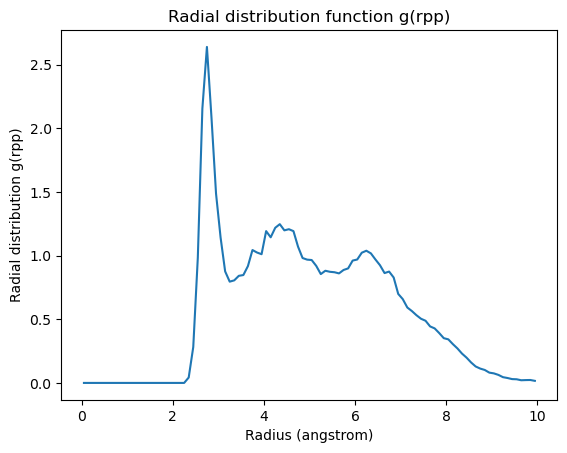

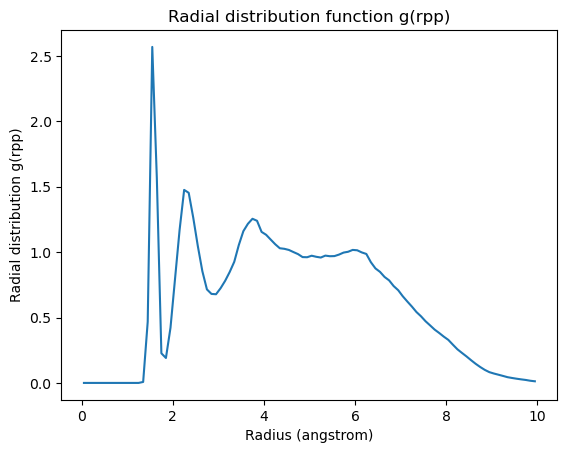

In [50]:
# Use MDAnalysis to read in the xyz trajectory file
u = MDAnalysis.Universe('../Runs/Proton/proton.xyz','../Runs/Proton/proton_aimd_1ps_every0.5fs-pos-1.xyz', topology_format="xyz")
# set the box size (12.42^3 angstroms)
dim = [12.42, 12.42, 12.42, 90, 90, 90]
# Use MDAanalysis to set box dimensions
transform = MDAnalysis.transformations.boxdimensions.set_dimensions(dim)
u.trajectory.add_transformations(transform)
# selecting the proton atoms for the rdf calculation
proton = u.select_atoms('type O')
# calculating the rdf
g_proton = rdf.InterRDF(proton, proton, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
g_proton.run()
# Plot the rdf
plt.plot(g_proton.bins, g_proton.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution g(rpp)')
plt.title('Radial distribution function g(rpp)')
# plt.savefig('g_11_T1.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
proton = u.select_atoms('type H')
g_proton = rdf.InterRDF(proton, proton, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
g_proton.run()
plt.plot(g_proton.bins, g_proton.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution g(rpp)')
plt.title('Radial distribution function g(rpp)')
plt.savefig('../Figures/g_pp.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()



